In [ ]:
!git clone https://github.com/ByjusBrazil/PRO_1-1_C113_HurricaneDamageDataset

fatal: destination path 'PRO_1-1_C113_HurricaneDamageDataset' already exists and is not an empty directory.


In [ ]:
#Dados de treinamento
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Aumento aleatório de dados (Redimensionamento, Rotação, Inversões, Zoom, Deslocamentos) usando ImageDataGenerator  
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Diretório de Imagens
training_image_directory = "/content/PRO_1-1_C113_HurricaneDamageDataset/train"

# Gere arquivos de imagem aumentada
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [ ]:
#Dados de validação
# Aumento aleatório de dados (redimensionamento) usando ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Diretório de Imagens
validation_image_directory = "/content/PRO_1-1_C113_HurricaneDamageDataset/validate"

# Gere dados aumentados pré-processados
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [ ]:
#etiquetas das classes
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

In [ ]:
#Definir CNN
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    # Primeira camada de Convolução e Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda camada de Convolução e Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Terceira camada de Convolução e Pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Quarta camada de Convolução e Pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatar (flatten) os resultados para alimentar em uma camada densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Camada de classificação
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
#Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(training_augmented_images, epochs=20, 
                    validation_data = validation_augmented_images, 
                    verbose=True)

model.save("Hurricane_damage.h5")

Epoch 1/20
10/10 [==============================] - 40s 4s/step - loss: 0.6899 - accuracy: 0.5133 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 39s 4s/step - loss: 0.6674 - accuracy: 0.5200 - val_loss: 0.7163 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 39s 4s/step - loss: 0.6611 - accuracy: 0.6500 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 38s 4s/step - loss: 0.5709 - accuracy: 0.6600 - val_loss: 0.6509 - val_accuracy: 0.6133
Epoch 5/20
10/10 [==============================] - 38s 4s/step - loss: 0.5182 - accuracy: 0.7733 - val_loss: 1.4613 - val_accuracy: 0.5067
Epoch 6/20
10/10 [==============================] - 38s 4s/step - loss: 0.6403 - accuracy: 0.6500 - val_loss: 0.5688 - val_accuracy: 0.7067
Epoch 7/20
10/10 [==============================] - 38s 4s/step - loss: 0.4679 - accuracy: 0.7933 - val_loss: 0.5809 - val_accuracy: 0.7700
Epoch 8/20
10/10 [==

In [ ]:
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

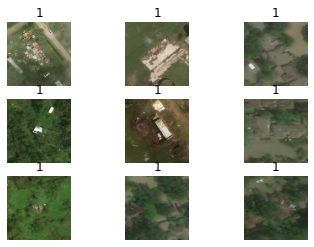

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Diretório de imagens de teste
testing_image_directory = '/content/PRO_1-1_C113_HurricaneDamageDataset/test/damage'

# Todos os arquivos de imagem no diretório
img_files = os.listdir(testing_image_directory)

i= 0

# Loop através de 9 arquivos de imagem
for file in img_files[51:60]:

  # caminho completo da imagem
  img_files_path = os.path.join(testing_image_directory, file)

  # carregar imagem
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # converter imagem para um array
  img_2 = img_to_array(img_1)

  # incrementar a dimensão
  img_3 = np.expand_dims(img_2, axis=0)
  
  # prever a classe de uma imagem não vista
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # plotar a imagem usando subimagens
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))
  
  # Adicionar o rótulo da imagem com o valor previsto da classe 
  pyplot.title(predict_class[0])

  # Não mostrar eixos x e y com a imagem
  pyplot.axis('off')

  i=i+1

pyplot.show()